In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import get_cmap
from scipy.signal import savgol_filter

# Fonction utilisées dans ce projet 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_acp_individuals(score, plan_indices, class_labels, explained_variance, individual_names=None):
    """
    Affiche la carte factorielle des individus d'une ACP.

    Args:
        score (array): Les scores (coordonnées des individus) de l'ACP.
        plan_indices (tuple): Les indices des composantes principales à afficher (par exemple, (0, 1) pour le plan 2D).
        class_labels (array): Les classes à utiliser pour colorier les individus.
        explained_variance (array): La variance expliquée par chaque composante principale de l'ACP.
        individual_names (array, facultatif): Les noms des individus (ou labels). Par défaut, None.
    """

    # Extraire les indices des composantes principales à afficher
    component1_index, component2_index = plan_indices

    # Plotter la carte factorielle des individus
    plt.figure(figsize=(16, 9))
    for label in set(class_labels):
        mask = (class_labels == label)
        plt.scatter(score[mask, component1_index], score[mask, component2_index], label=label)

    # Ajouter des labels aux points (en vérifiant si le nom est différent de None)
    if individual_names is not None:
        for i, name in enumerate(individual_names):
            if name is not None:
                plt.annotate(name, (score[i, component1_index], score[i, component2_index]))

    # Afficher la variance expliquée par chaque composante dans le titre du graphique
    plt.title('Carte Factorielle des Individus\n' + '\n'.join([f'Composante {i+1}: {explained_variance[i]:.2%}' for i in plan_indices]))
    plt.xlabel(f'Composante Principale {component1_index + 1}')
    plt.ylabel(f'Composante Principale {component2_index + 1}')
    plt.legend()
    plt.grid(True, axis='both')
    plt.show()

# Exemple d'utilisation de la fonction avec individual_names facultatif
# Vous pouvez fournir ou omettre individual_names en fonction de vos besoins.
# plot_acp_individuals(score, (0, 1), class_labels, explained_variance)
# plot_acp_individuals(score, (0, 1), class_labels, explained_variance, individual_names)


# 1 description du projet
La tavelure est une maladie induite par un champignon, qui attaque les feuilles de pommier comme sur la figure 1.
![Alt text](<Capture d’écran 2023-09-28 à 19.16.07.png>)

Figure 1 – Exemple de feuille atteinte de tavelure. Source : wikipedia.

Des images hyperspectrales de 21 feuilles ont  ́et ́e acquises en r ́eflectance par l’IRSTEA Montpel- lier. 
Pour chaque feuille, plusieurs spectres ont  ́et ́e extraits soit des zones malades, soit des zones saines. Au final, chaque feuille est repr ́esent ́ee par deux spectres, le spectre moyen des zones malades et le spectre moyen des zones saines.
Le jeu de donn ́ees comporte 42 spectres infrarouges de 21 zones saines et 21 zones atteintes de tave- lure. Les spectres contiennent 256 longueurs d’onde entre 964 et 2494nm.
Les 21 premiers individus sont issus de feuilles saines, les 21 suivants sont issus de feuilles malades. Les donn ́ees sont dans le fichier x tavelure.csv, s ́eparateur de champ= ’,’ disponible sur www.chemserver a` l’onglet donn ́ees, ou dans le fichier x tavelure.tab, s ́eparateur de champ = tabulation disponible dans ChemFlow.

# 2 spectres non prétraités

## 2-1 visualisation des spectres non prétraités


In [4]:
# importer les données
infos = pd.read_csv("data/donnees_tavelure/code_tavelure.csv")
data = pd.read_csv ("data/donnees_tavelure/x_tavelure.csv")

In [5]:
infos.head()

,classe,sain/malade
0,sain1,1
1,sain2,1
2,sain3,1
3,sain4,1
4,sain5,1


In [6]:
data.head()

,classe,964.181,970.182,976.183,982.184,988.185,994.185,1000.19,1006.19,1012.19,...,2440.38,2446.38,2452.38,2458.38,2464.38,2470.39,2476.39,2482.39,2488.39,2494.39
0,sain1,0.349501,0.397259,0.401449,0.403975,0.404016,0.404353,0.405628,0.404917,0.405226,...,0.137185,0.131706,0.128795,0.123609,0.118540,0.116798,0.113483,0.106677,0.106610,0.103472
1,sain2,0.354758,0.464766,0.468877,0.470326,0.472845,0.473205,0.475383,0.475189,0.475764,...,0.180858,0.176896,0.171839,0.166865,0.161094,0.152992,0.153374,0.151678,0.144733,0.148472
2,sain3,0.294942,0.342542,0.342730,0.343264,0.345022,0.344856,0.346093,0.345533,0.346527,...,0.087303,0.080622,0.078964,0.071460,0.069575,0.066720,0.069356,0.064486,0.063863,0.060029
3,sain4,0.208075,0.228969,0.230805,0.230899,0.228309,0.229107,0.228203,0.227944,0.229307,...,0.071922,0.068474,0.066849,0.065863,0.059206,0.062855,0.055404,0.053729,0.055769,0.052300
4,sain5,0.310761,0.378748,0.378962,0.382870,0.383176,0.384265,0.384513,0.384595,0.385244,...,0.135670,0.132507,0.130325,0.125246,0.120189,0.117001,0.115491,0.109483,0.111581,0.108844


In [7]:
### ranger les infos utiles dans des array
intensities = data.drop('classe',axis = 1)
intensities= intensities.values
intensities

array([[0.3495014, 0.3972586, 0.4014491, ..., 0.106677 , 0.1066097,
        0.1034725],
       [0.3547583, 0.4647664, 0.4688774, ..., 0.1516781, 0.144733 ,
        0.148472 ],
       [0.2949418, 0.3425418, 0.3427302, ..., 0.0644861, 0.0638628,
        0.0600289],
       ...,
       [0.255552 , 0.2968874, 0.2945389, ..., 0.1555923, 0.1478377,
        0.1474119],
       [0.2451377, 0.2802093, 0.2835011, ..., 0.1587809, 0.163078 ,
        0.1498051],
       [0.2492504, 0.2989337, 0.3023245, ..., 0.1647644, 0.1646133,
        0.1709126]])

In [8]:
labels= infos['sain/malade']
labels = labels.values
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
noms_des_individus = infos['classe']
noms_des_individus = noms_des_individus.values

In [10]:
wavelength = data.drop('classe',axis= 1)
wavelength =  np.array(wavelength.columns, dtype=float)

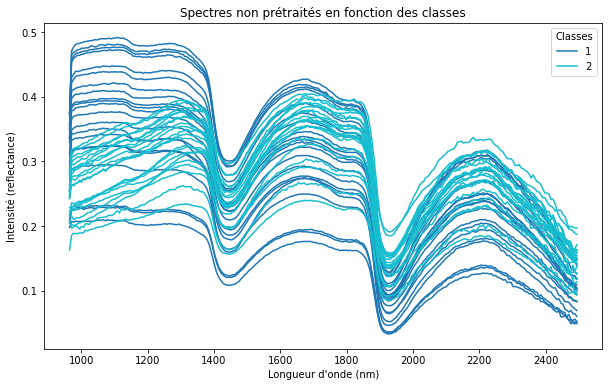

In [11]:

# Créer un dictionnaire pour mapper les couleurs aux labels
unique_labels = np.unique(labels)
color_map = plt.cm.get_cmap('tab10', len(unique_labels))  # Utiliser la colormap 'tab10'

# Tracer les spectres avec les couleurs basées sur les labels
plt.figure(figsize=(10, 6))
for i in range(len(labels)):
    label = labels[i]
    color = color_map(unique_labels.tolist().index(label))  # Associer la couleur basée sur l'index du label unique
    plt.plot(wavelength, intensities[i], label=label, color=color)

plt.xlabel('Longueur d\'onde (nm)')
plt.ylabel('Intensité (reflectance)')
plt.title('Spectres non prétraités en fonction des classes')

# Créer une légende avec des couleurs basées sur les labels uniques
handles = [plt.Line2D([0], [0], color=color_map(i), label=label) for i, label in enumerate(unique_labels)]
plt.legend(handles=handles, title='Classes', loc='upper right')

# Afficher le graphique
plt.show()


1 : sain 
2  : malade

### Observation de la visualisation 
- sur la forme des spectres ?
    -  On observe deux creux très marqué au niveau de 1400 nm et 1900 nm
    - decroissance de la ligne  de base
- sur les diff ́erences entre les spectres, indiff ́eremment des classes ?
    - différence entre les spectres d'une même classe (intraclasse - forte dispersion) s'apparente à un éffet multiplicatif
- entre les deux classes
    - différence entre 1000 nm et 1300 nm les spectres malades on a une evolution croissante tandis que les spectres des feuilles seines dans cette zone forme un plateau

## 2-2 Représentation des sorties de l’ACP non pretraitee.



In [52]:
pca = PCA( 10)
X = intensities
pca = pca.fit(X)
explained_variance = pca.explained_variance_ratio_ ## variance expliqué par l'ACP
score = pca.transform(X)
score

array([[-3.60419673e-01, -4.65105951e-01, -1.02705205e-02,
         7.92179070e-03, -3.34788223e-04, -2.29295416e-02,
         3.68085393e-03, -3.35021534e-03, -5.75518666e-03,
        -6.69538234e-03],
       [-1.37536288e+00, -4.13791296e-01,  1.90300838e-02,
         5.44265938e-03, -7.05631599e-03,  1.96143674e-02,
         1.40062180e-02,  3.02798948e-04,  4.07734025e-03,
         2.05876875e-04],
       [ 7.07101633e-01, -6.48012966e-01, -9.70425672e-02,
         2.44699310e-02,  1.67224990e-02,  2.73090735e-03,
        -3.04989932e-03, -8.87211671e-03, -2.22690764e-03,
        -9.12831508e-03],
       [ 1.75661910e+00, -2.78217991e-01,  3.28655888e-02,
        -2.63585591e-03,  3.96279720e-03,  3.98270625e-03,
        -1.40410008e-03, -8.37798923e-04, -2.25338192e-04,
        -9.89245002e-04],
       [-1.37057481e-01, -4.17573463e-01,  8.29693478e-03,
         2.37600000e-02, -1.46532031e-02,  1.49725428e-02,
        -7.10274760e-04, -1.53096115e-04, -9.68083693e-04,
         3.

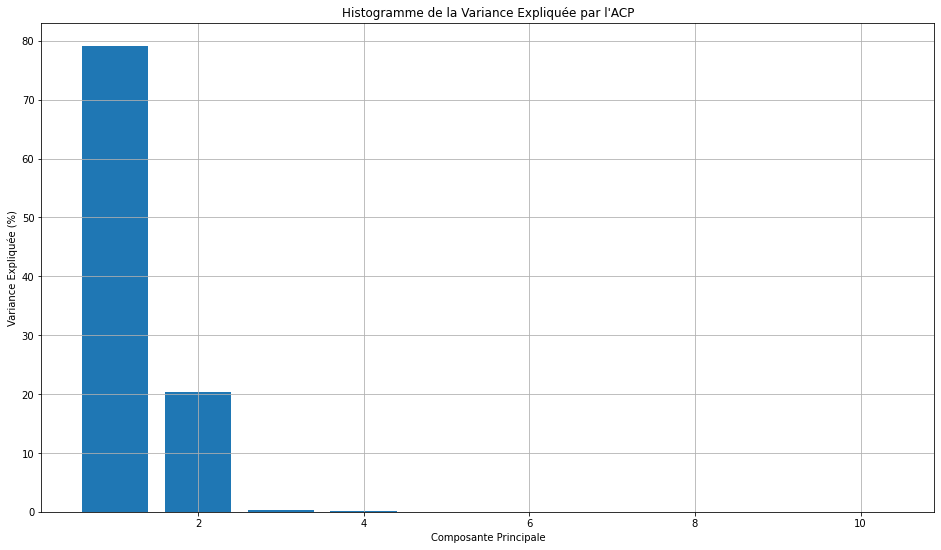

In [53]:
### visualisation de la variance expliquée par l'ACP
plt.figure(figsize=(16,9))
plt.bar(range(1, len(explained_variance) + 1), explained_variance*100, align='center')
plt.title('Histogramme de la Variance Expliquée par l\'ACP')
plt.xlabel('Composante Principale')
plt.ylabel('Variance Expliquée (%)')
plt.grid(True)
plt.show()

### Observavtion de la variance expliquée par chaque composante 
- plus de 70% de la variance est expliqué par la CP1 puis 20 % par l'autre CP1 du coup les deux prémière CP interprete 90 % de la variance du jeu


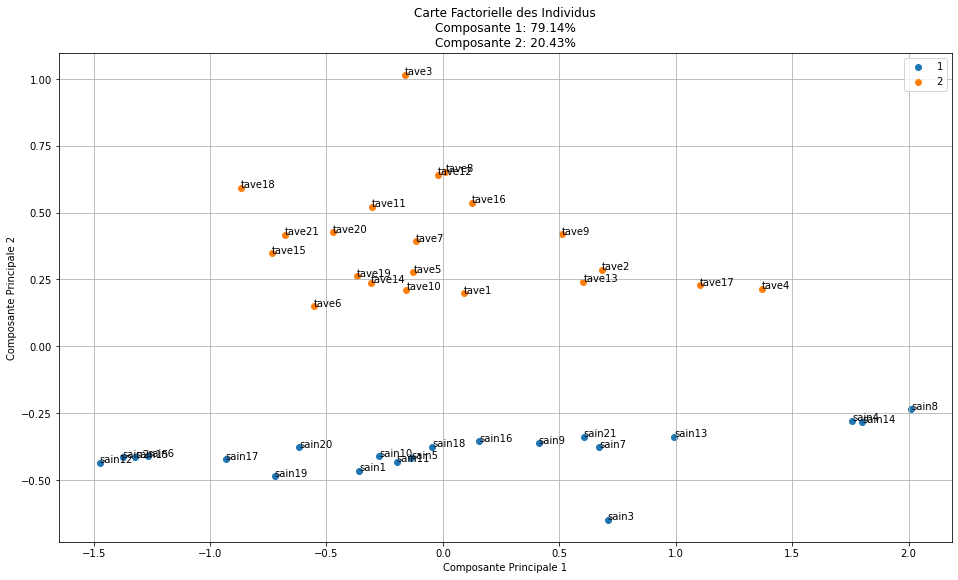

In [54]:
plot_acp_individuals(score=score, plan_indices=(0,1) , class_labels= labels , individual_names=noms_des_individus , explained_variance = explained_variance )

### observation sur la carte factorielle des plans 1 et 2 
- on observe une séparation entre les indivdus sains et les individus malades
- on observe une forte dispersion intraclasse suivant la CP1 qui explique un autre phénomène autre que l'état des plantes
- l'etat des plantes est mieux expliqué par la CP2.


### Visualisation des loadings en fonctions des longueurs d'ondes

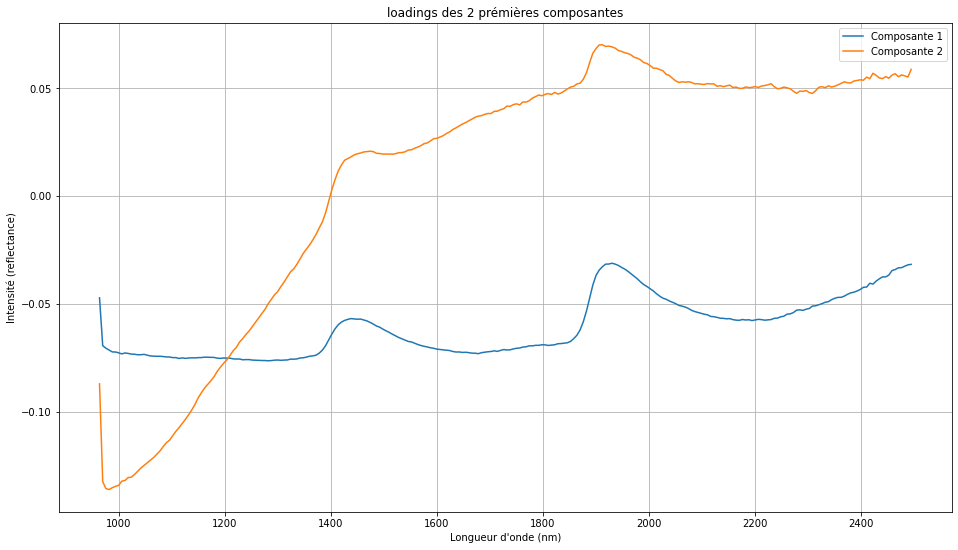

In [55]:
## recupere les valeurs de loadings
pca_loadings = pca.components_
pca_loadings = pca_loadings[0:2]
pca_labels = ["Composante 1", "Composante 2"]
plt.figure(figsize=(16,9))
for i in range(len(pca_loadings)):
    plt.plot(wavelength,pca_loadings[i],label =pca_labels[i])
plt.legend()
plt.xlabel ('Longueur d\'onde (nm)')
plt.ylabel('Intensité (reflectance)')
plt.title('loadings des 2 prémières composantes')
plt.grid(True)

### Observation sur les loadings 1 et 2, en relation avec la carte factorielle ?

- le loading 1 n'est pas interressant a analysé pour notre étude car aucune variation et de nombreux pics qui traduisent d'autre phénomènes 
- le loading 2 par contre est pertinent on observe une evolution croissante similaire à celle des spectres des individus malade ainsi pour que nous puissions retournée à la croissance initiale le coefficient va être positif ce qui se traduit par le positionnement des individus dans la partie positive selon la composante 2 ou l'axe 2 et vu que dans le cas des spectres non malade on a pas de croissance mais une decroissance comparé au spectre malade on aura des coefficient négatif pour voici ce qui explisue le positionnement des individus sains